# Лекция 3: Библиотеки для глубинного обучения. Примитивы фреймворка PyTorch. 

## На сегодняшней лекции мы разберем, зачем нужны фреймворки для глубинного обучения и как устроены базовые методы и классы PyTorch

In [1]:
import IPython
# IPython.display.Image("what is pytorch.png")

#        Пример обучения нейронной сети в numpy

In [3]:
# -*- coding: utf-8 -*-
import numpy as np

# N - размер батча; D_in - размерность входа;
# H - скрытая размероность; D_out размерность выхода.
N, D_in, H, D_out = 64, 1000, 100, 10

# Инициализируем вход и выход из нормального распределения
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# Инициализируем веса из нормального распределения
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6
for t in range(500):

    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    
    # Используем функцию активации ReLU
    
    y_pred = h_relu.dot(w2)

    # Считаем функцию потерь
    loss = np.square(y_pred - y).sum()
    print(t, loss)

    # Считаем градиенты
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    
    # Считаем композицию с производной ReLU
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)

    # Обновляем веса
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 30004126.70067886
1 25137146.295258902
2 25566248.91043853
3 26887414.300808027
4 26347330.796009623
5 21958852.535716306
6 15593801.490670294
7 9457337.387708504
8 5357860.252655358
9 3017895.5131288567
10 1822986.0270660198
11 1209349.3393693257
12 881201.3575409125
13 688552.8505487028
14 563589.6307160144
15 474519.14510377013
16 406570.0150941517
17 352191.67431136407
18 307548.0332217643
19 270112.9031064944
20 238309.5822457649
21 211023.35087796347
22 187478.4855485544
23 167041.043113536
24 149245.7849725263
25 133667.27174106982
26 120003.90606407449
27 107967.23747322797
28 97328.77332662497
29 87895.73406336523
30 79516.80011163163
31 72062.88368397081
32 65407.64793515857
33 59457.11618176378
34 54147.350833132965
35 49375.264161668914
36 45084.52120778299
37 41225.52692487507
38 37742.945319430495
39 34595.79636917492
40 31752.338020762225
41 29178.488228175145
42 26841.136492682228
43 24717.61986715725
44 22783.625696106537
45 21022.01058465134
46 19414.34690750201
47 

415 0.0004041516359317652
416 0.0003883493372205108
417 0.0003731738999377043
418 0.0003585946698555139
419 0.0003445981779245774
420 0.0003311519250249051
421 0.0003182404051865781
422 0.0003058301779735347
423 0.00029390720310139767
424 0.0002824543660728699
425 0.00027145772525705885
426 0.0002608930038915423
427 0.0002507416677946247
428 0.000240989061759242
429 0.00023162437340977412
430 0.0002226228247051056
431 0.00021397506828613693
432 0.00020567361091107799
433 0.00019769391314857106
434 0.00019002532800194708
435 0.0001826559823166474
436 0.00017557529057142215
437 0.00016877746695740512
438 0.00016224204354708458
439 0.00015596088800152164
440 0.00014992637837970253
441 0.00014412839961769997
442 0.00013855621345775586
443 0.00013320230153089687
444 0.00012805703565198998
445 0.00012311783194759042
446 0.00011836631378276427
447 0.00011379957680079185
448 0.00010941122805596706
449 0.00010519585017896904
450 0.00010114178392526169
451 9.724577376757536e-05
452 9.35019389259

# Первая и основная составляющая типичного современного фреймворка для машинного обучения - Tensor

В интерфейсе базовых операций тензор ничем не отличается от __np.ndarray__, но при этом тензоры можно эффективно использовать при обучении на gpu. 

In [4]:
import torch

In [5]:
# Создаем неинициализированный тензор
x = torch.Tensor(5, 3)

In [6]:
x

tensor([[-1.6843e-01,  4.5815e-41,  5.6052e-45],
        [ 0.0000e+00,  2.8026e-45,  0.0000e+00],
        [-6.2615e-22,  4.5815e-41,  1.4013e-45],
        [ 4.5815e-41, -1.7694e-01,  4.5815e-41],
        [-1.7695e-01,  4.5815e-41, -1.7695e-01]])

In [7]:
# Типы
torch.FloatTensor
torch.LongTensor
torch.ByteTensor

torch.ByteTensor

In [8]:
x = torch.Tensor(5, 3).type(torch.FloatTensor)

In [9]:
# инициализируем тензор нормальным распределением
x = torch.randn(5, 3)

In [10]:
x

tensor([[-1.0993,  1.3285,  1.1058],
        [-1.9283, -0.9980,  1.6498],
        [-0.2740,  0.4717, -1.9919],
        [-1.5583,  0.8020,  0.1601],
        [-1.6577, -0.7535, -0.2435]])

In [11]:
x.shape

torch.Size([5, 3])

In [12]:
x.size()

torch.Size([5, 3])

In [15]:
y = torch.rand(5, 3)

In [16]:
y

tensor([[0.9171, 0.5416, 0.4298],
        [0.7995, 0.3865, 0.4038],
        [0.9243, 0.5757, 0.3536],
        [0.6444, 0.1878, 0.5027],
        [0.6079, 0.7784, 0.8191]])

In [17]:
# Первый способ сложить 2 тензора
x + y

tensor([[-0.1822,  1.8701,  1.5356],
        [-1.1289, -0.6115,  2.0536],
        [ 0.6503,  1.0474, -1.6383],
        [-0.9139,  0.9898,  0.6628],
        [-1.0498,  0.0249,  0.5756]])

In [18]:
# Второй способ сложить 2 тензора
x.add(y)

tensor([[-0.1822,  1.8701,  1.5356],
        [-1.1289, -0.6115,  2.0536],
        [ 0.6503,  1.0474, -1.6383],
        [-0.9139,  0.9898,  0.6628],
        [-1.0498,  0.0249,  0.5756]])

In [19]:
# А еще можно так:
torch.add(x, y)

tensor([[-0.1822,  1.8701,  1.5356],
        [-1.1289, -0.6115,  2.0536],
        [ 0.6503,  1.0474, -1.6383],
        [-0.9139,  0.9898,  0.6628],
        [-1.0498,  0.0249,  0.5756]])

In [20]:
# Сохраняем выход в тензор result
result = torch.Tensor(5, 3)
torch.add(x, y, out=result)

tensor([[-0.1822,  1.8701,  1.5356],
        [-1.1289, -0.6115,  2.0536],
        [ 0.6503,  1.0474, -1.6383],
        [-0.9139,  0.9898,  0.6628],
        [-1.0498,  0.0249,  0.5756]])

In [21]:
# Перевод из numpy в torch
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b) 

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [22]:
a = torch.randn(5, 3) 
b = torch.randn(3, 4)

In [23]:
# Матричное умножение

torch.mm(a,b)
a.mm(b)

tensor([[ 1.9613, -0.1924, -1.8308, -1.6571],
        [-1.1302, -0.6530, -1.2051,  1.1801],
        [ 1.4344, -0.1219, -1.1061, -0.7436],
        [ 3.5451, -0.4217, -2.2324,  0.4931],
        [ 1.9854,  1.1493,  2.7508, -0.3948]])

In [24]:
# для python 3

a @ b

tensor([[ 1.9613, -0.1924, -1.8308, -1.6571],
        [-1.1302, -0.6530, -1.2051,  1.1801],
        [ 1.4344, -0.1219, -1.1061, -0.7436],
        [ 3.5451, -0.4217, -2.2324,  0.4931],
        [ 1.9854,  1.1493,  2.7508, -0.3948]])

In [25]:
device = torch.cuda.device(3)

In [26]:
torch.cuda.set_device(3)

AssertionError: 
Found no NVIDIA driver on your system. Please check that you
have an NVIDIA GPU and installed a driver from
http://www.nvidia.com/Download/index.aspx

Поменяем пару строчек в обучении на __numpy__ и код уже можно запускать и на GPU. Например, __dtype = torch.cuda.FloatTensor__

In [28]:
dtype = torch.FloatTensor
# dtype = torch.cuda.FloatTensor # GPU

N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in).type(dtype)
y = torch.randn(N, D_out).type(dtype)

w1 = torch.randn(D_in, H).type(dtype)
w2 = torch.randn(H, D_out).type(dtype)

learning_rate = 1e-6
for t in range(500):

    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)

    loss = (y_pred - y).pow(2).sum()
    print(t, loss)

    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 tensor(28585496.)
1 tensor(23260260.)
2 tensor(21914390.)
3 tensor(21142226.)
4 tensor(19149624.)
5 tensor(15625848.)
6 tensor(11375317.)
7 tensor(7571510.)
8 tensor(4775920.)
9 tensor(2997365.7500)
10 tensor(1932066.3750)
11 tensor(1311491.1250)
12 tensor(943234.8750)
13 tensor(716873.8125)
14 tensor(569844.8750)
15 tensor(468614.2188)
16 tensor(394816.7812)
17 tensor(338266.0938)
18 tensor(293264.1562)
19 tensor(256433.8750)
20 tensor(225666.0781)
21 tensor(199584.1719)
22 tensor(177269.8438)
23 tensor(158061.1719)
24 tensor(141408.3281)
25 tensor(126849.7266)
26 tensor(114064.2266)
27 tensor(102813.3203)
28 tensor(92866.3203)
29 tensor(84037.5625)
30 tensor(76182.0156)
31 tensor(69177.2422)
32 tensor(62915.2227)
33 tensor(57301.9023)
34 tensor(52266.4609)
35 tensor(47739.3672)
36 tensor(43660.3672)
37 tensor(39979.0547)
38 tensor(36650.4844)
39 tensor(33639.2891)
40 tensor(30908.4336)
41 tensor(28427.0684)
42 tensor(26169.3652)
43 tensor(24113.1836)
44 tensor(22237.7402)
45 tensor

438 tensor(0.0002)
439 tensor(0.0002)
440 tensor(0.0002)
441 tensor(0.0002)
442 tensor(0.0002)
443 tensor(0.0002)
444 tensor(0.0002)
445 tensor(0.0002)
446 tensor(0.0002)
447 tensor(0.0002)
448 tensor(0.0002)
449 tensor(0.0002)
450 tensor(0.0001)
451 tensor(0.0001)
452 tensor(0.0001)
453 tensor(0.0001)
454 tensor(0.0001)
455 tensor(0.0001)
456 tensor(0.0001)
457 tensor(0.0001)
458 tensor(0.0001)
459 tensor(0.0001)
460 tensor(0.0001)
461 tensor(0.0001)
462 tensor(0.0001)
463 tensor(0.0001)
464 tensor(0.0001)
465 tensor(0.0001)
466 tensor(0.0001)
467 tensor(0.0001)
468 tensor(0.0001)
469 tensor(0.0001)
470 tensor(0.0001)
471 tensor(0.0001)
472 tensor(0.0001)
473 tensor(0.0001)
474 tensor(9.9092e-05)
475 tensor(9.7783e-05)
476 tensor(9.5837e-05)
477 tensor(9.4820e-05)
478 tensor(9.3345e-05)
479 tensor(9.1880e-05)
480 tensor(9.0473e-05)
481 tensor(8.9389e-05)
482 tensor(8.7948e-05)
483 tensor(8.6607e-05)
484 tensor(8.5108e-05)
485 tensor(8.4018e-05)
486 tensor(8.2741e-05)
487 tensor(8.1618

# Но самое важное в фреймворках - графы вычисления и автоматическое дифференцирование 

In [32]:
# Variable - обертка над тензором, содержащая значения градиента и еще немного полезной информации
import torch
from torch.autograd import Variable
x = Variable(torch.ones(2, 2), requires_grad = True)
x  

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [33]:
# В pytorch начиная с версии 1.0, Tensor может содержать в себе всю эту информацию
import torch
from torch.autograd import Variable
x = torch.ones(2, 2, requires_grad=True)
x  

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [34]:
x.data

tensor([[1., 1.],
        [1., 1.]])

In [38]:
x.grad

In [39]:
# производная операции, которая породила переменную.
x.grad_fn

# Задаем граф вычислений: #

In [40]:
y = x + 2
z = y * y * 2
out = z.mean()
out

tensor(18., grad_fn=<MeanBackward0>)

In [41]:
# Запускаем бэкпроп
out.backward()

In [42]:
x.grad

tensor([[3., 3.],
        [3., 3.]])

In [43]:
out.grad == None

True

# Что произошло?

__autograd__ строит ациклический граф вычисления из переменных и операций (функций)
__out.backward__ проходит по всему графу начиная от вершины out и считает градиенты вершин

В __pyTorch__ начиная с версии 0.3 промежуточные градиенты не сохраняются.
Но если мы хотим все-таки увидеть их значения можно использовать
функцию __tensor.register_hook(print)__
или использовать __tensor.retain_grad()__

In [44]:
from __future__ import print_function
x = torch.ones(2, 2, requires_grad = True)
y.register_hook(print)
y = x + 2
z = y * y * 2
z.register_hook(print)
out = z.mean()
out

tensor(18., grad_fn=<MeanBackward0>)

In [45]:
out.backward()

tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])


In [48]:
v = torch.randn(3, requires_grad=True)
v2 = v+1
v2.retain_grad()
v2.sum().backward()
v2.grad

tensor([1., 1., 1.])

In [49]:
v.grad

tensor([1., 1., 1.])

Если мы хотим сохранить значения переменных в графе, то используем retain_graph = True. 
Это может быть нужно, если мы хотим несколько раз подряд сделать backprop

In [50]:
f = torch.randn(2, requires_grad=True)
g = f[0] * f[1]
g.backward(retain_graph=True)
f.grad
g.backward()
f.grad

tensor([4.1142, 2.4697])

In [53]:
f = torch.randn(2, requires_grad=True)
g = f[0] * f[1]
g.backward()
f.grad
g.backward()
f.grad

RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.

In [54]:
x = torch.ones(2, 2, requires_grad=True )
y = x + 2
y.backward(torch.ones(2, 2), retain_graph=True)
x.grad



tensor([[1., 1.],
        [1., 1.]])

__torch.autograd.Function__ - базовый класс дифференецируемых функций-составных частей графа вычислений

In [55]:
class MyReLU(torch.autograd.Function):

    def forward(self, input):
        # forward pass
        self.save_for_backward(input)
        return input.clamp(min=0)

    def backward(self, grad_output):
        # backward pass
        input, = self.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0
        return grad_input



In [56]:
MyReLU()(torch.randn(2))

/opt/conda/conda-bld/pytorch_1573049310284/work/torch/csrc/autograd/python_function.cpp:622: UserWarning: Legacy autograd function with non-static forward method is deprecated and will be removed in 1.3. Please use new-style autograd function with static forward method. (Example: https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)


tensor([0.6267, 0.0000])

# Снова вернемся к исходной двухслойной сети

In [57]:
import torch

dtype = torch.FloatTensor
# dtype = torch.cuda.FloatTensor # GPU

N, D_in, H, D_out = 64, 1000, 100, 10


x = torch.randn(N, D_in, requires_grad=False).type(dtype)
y = torch.randn(N, D_out, requires_grad=False).type(dtype)


w1 = torch.randn(D_in, H, requires_grad=True).type(dtype)
w2 = torch.randn(H, D_out, requires_grad=True).type(dtype)

learning_rate = 1e-6
for t in range(500):
    y_pred = x.mm(w1).clamp(min=0).mm(w2)

    loss = (y_pred - y).pow(2).sum()
    print(t, loss.item())
    
    # Обнуляем градиенты
    if w1.grad is not None:
        w1.grad.data.zero_()
    if w2.grad is not None:
        w2.grad.data.zero_()

    loss.backward()

    w1.data -= learning_rate * w1.grad.data
    w2.data -= learning_rate * w2.grad.data

0 38294348.0
1 36080436.0
2 34763168.0
3 29289804.0
4 20264238.0
5 11710605.0
6 6236476.5
7 3435947.25
8 2115405.0
9 1470171.125
10 1118151.5
11 898699.125
12 745462.75
13 630270.1875
14 539499.0
15 465860.6875
16 404976.5
17 354051.25
18 311028.9375
19 274499.84375
20 243241.171875
21 216316.953125
22 193036.34375
23 172807.671875
24 155137.953125
25 139660.921875
26 126061.71875
27 114051.84375
28 103412.7421875
29 93967.546875
30 85554.9375
31 78043.5859375
32 71309.90625
33 65265.6796875
34 59826.57421875
35 54921.0234375
36 50490.47265625
37 46479.265625
38 42843.27734375
39 39542.484375
40 36539.703125
41 33804.76171875
42 31309.14453125
43 29028.068359375
44 26942.033203125
45 25030.77734375
46 23276.712890625
47 21665.40625
48 20183.9921875
49 18820.19921875
50 17564.486328125
51 16405.345703125
52 15335.302734375
53 14345.7890625
54 13430.2294921875
55 12581.890625
56 11795.486328125
57 11065.740234375
58 10387.7705078125
59 9758.27734375
60 9172.8818359375
61 8627.677734375
6

420 0.010664944536983967
421 0.010308624245226383
422 0.009974793531000614
423 0.00965137593448162
424 0.009333629161119461
425 0.00902928039431572
426 0.008736775256693363
427 0.00845237635076046
428 0.00817797239869833
429 0.007913126610219479
430 0.007654511835426092
431 0.007407248951494694
432 0.007171048782765865
433 0.006941152736544609
434 0.006720095872879028
435 0.006500621326267719
436 0.006295774597674608
437 0.006097124889492989
438 0.005902661941945553
439 0.005720426328480244
440 0.005537845194339752
441 0.005364969372749329
442 0.00519502442330122
443 0.00503051932901144
444 0.004872638266533613
445 0.004719743970781565
446 0.00457144808024168
447 0.004430772736668587
448 0.004293195437639952
449 0.004158306866884232
450 0.004030587151646614
451 0.003909615334123373
452 0.003787829540669918
453 0.00367395649664104
454 0.0035638795234262943
455 0.003453916171565652
456 0.0033496469259262085
457 0.003247801447287202
458 0.0031514721922576427
459 0.003056110581383109
460 0

# Наконец, в PyTorch базовые слои нейронных сетей уже реализованы.

### ``Sequental`` - последовательность базовых слоев и функций активаций
### ``Linear(input dimension, output dimension)`` - линейный слой
### ``torch.nn.ReLU``, ``torch.nn.Sigmoid``,``torch.nn.Tanh``, etc. - функции активации
### ``torch.nn.MSELoss`` - среднеквадратичная функция потерь.

In [58]:
from torch.autograd import Variable

N, D_in, D_out = 64, 1000, 10

x = torch.randn(N, D_in, requires_grad=False)
y = torch.randn(N, D_out, requires_grad=False)

model = torch.nn.Sequential(
          torch.nn.Linear(D_in, D_out)
        )

loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4
for t in range(500):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print(t, loss.item())

    model.zero_grad()

    loss.backward()

    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

/home/waffpad/anaconda3/lib/python3.7/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


0 823.8860473632812
1 528.2416381835938
2 343.763427734375
3 226.82650756835938
4 151.5852508544922
5 102.48676300048828
6 70.02571105957031
7 48.303871154785156
8 33.606876373291016
9 23.562379837036133
10 16.63467788696289
11 11.817057609558105
12 8.441774368286133
13 6.061054229736328
14 4.371614456176758
15 3.166137456893921
16 2.301692485809326
17 1.6790032386779785
18 1.2286157608032227
19 0.901628315448761
20 0.6634189486503601
21 0.48933807015419006
22 0.3617521822452545
23 0.26799461245536804
24 0.1989254653453827
25 0.14792774617671967
26 0.11019197851419449
27 0.0822143629193306
28 0.0614330992102623
29 0.04596969485282898
30 0.03444516286253929
31 0.025842512026429176
32 0.019411826506257057
33 0.014597930945456028
34 0.01098988763988018
35 0.008282061666250229
36 0.006247729528695345
37 0.004717506468296051
38 0.003565245307981968
39 0.0026968009769916534
40 0.002041553845629096
41 0.0015467422781512141
42 0.0011727928649634123
43 0.0008899131789803505
44 0.000675719464197

383 1.5369055854363989e-12
384 1.4998518919895343e-12
385 1.3903839017614938e-12
386 1.4565809496047688e-12
387 1.498380846481906e-12
388 1.499352291628453e-12
389 1.4419260056797167e-12
390 1.3884687670440155e-12
391 1.4128936735857689e-12
392 1.349610961182135e-12
393 1.3335127273250702e-12
394 1.3972395289385542e-12
395 1.457469128024469e-12
396 1.532853271396517e-12
397 1.5971629400979293e-12
398 1.6107354165739718e-12
399 1.6136775075892285e-12
400 1.6989981470316717e-12
401 1.7038831283400224e-12
402 1.6403644935436557e-12
403 1.6044765342726475e-12
404 1.7693446534294832e-12
405 1.731666459531267e-12
406 1.557611244845658e-12
407 1.6562545605836032e-12
408 1.676696542024514e-12
409 1.5290230019615603e-12
410 1.6119566619010595e-12
411 1.5286344239029415e-12
412 1.465768045133542e-12
413 1.4800066554243596e-12
414 1.4437578736703482e-12
415 1.4247175487980268e-12
416 1.415433308754599e-12
417 1.3450729245689796e-12
418 1.374813023841126e-12
419 1.3717043993721756e-12
420 1.284718

In [59]:
loss_fn(model(x), y)

tensor(1.0826e-12, grad_fn=<MseLossBackward>)

# А еще в PyTorch есть уже готовые оптимизаторы, такие как GD, SGD, ADAM, etc.

In [60]:
N, D_in, D_out = 64, 1000, 10

x = torch.randn(N, D_in, requires_grad=False)
y = torch.randn(N, D_out, requires_grad=False)


model = torch.nn.Sequential(
          torch.nn.Linear(D_in, D_out),
        )
loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for t in range(500):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print(t, loss.item())

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

0 825.4105834960938
1 810.7767333984375
2 796.2916259765625
3 781.9574584960938
4 767.7763671875
5 753.7503662109375
6 739.8812866210938
7 726.1708984375
8 712.620849609375
9 699.2326049804688
10 686.007568359375
11 672.9469604492188
12 660.0518188476562
13 647.3231201171875
14 634.76171875
15 622.3682250976562
16 610.1432495117188
17 598.0870971679688
18 586.2001342773438
19 574.4823608398438
20 562.9338989257812
21 551.5546264648438
22 540.34423828125
23 529.302490234375
24 518.4287719726562
25 507.7226257324219
26 497.1833801269531
27 486.8102111816406
28 476.6023254394531
29 466.55877685546875
30 456.6785583496094
31 446.9605407714844
32 437.4036560058594
33 428.0065612792969
34 418.76812744140625
35 409.6869201660156
36 400.7615966796875
37 391.9907531738281
38 383.37286376953125
39 374.906494140625
40 366.5900573730469
41 358.4219970703125
42 350.4007263183594
43 342.5246276855469
44 334.7919921875
45 327.20123291015625
46 319.7506103515625
47 312.4384460449219
48 305.26303100585

390 0.000139988333103247
391 0.0001312101085204631
392 0.00012295410851947963
393 0.00011521548731252551
394 0.00010793902038130909
395 0.00010109938739333302
396 9.469216456636786e-05
397 8.867474389262497e-05
398 8.301997149828821e-05
399 7.771628588670865e-05
400 7.273244409589097e-05
401 6.80754819768481e-05
402 6.368894537445158e-05
403 5.958296242170036e-05
404 5.572346708504483e-05
405 5.211434472585097e-05
406 4.872395220445469e-05
407 4.555635678116232e-05
408 4.257958062225953e-05
409 3.9792652387404814e-05
410 3.7184174288995564e-05
411 3.4736396628431976e-05
412 3.245607149438001e-05
413 3.031038613698911e-05
414 2.830507219186984e-05
415 2.6425246687722392e-05
416 2.4665800083312206e-05
417 2.3023267203825526e-05
418 2.148243220290169e-05
419 2.004323323490098e-05
420 1.869680272648111e-05
421 1.7438536815461703e-05
422 1.625921686354559e-05
423 1.516195152362343e-05
424 1.4134767297946382e-05
425 1.3170787497074343e-05
426 1.2278385838726535e-05
427 1.1434882253524847e-05

In [61]:
sgd = torch.optim.SGD
adadelta = torch.optim.Adadelta
adagrad = torch.optim.Adagrad
rmsprop = torch.optim.RMSprop

# Сохранение и загрузка модели

In [62]:
# Сохранение
def save_checkpoint(state, filename='checkpoint.pth.tar'):
    torch.save(state, filename)

epoch =1    
save_checkpoint({
            'epoch': epoch,
            'state_dict': model.state_dict(),
            'optimizer' : optimizer.state_dict(),
        })

In [63]:
# Пример загрузки

checkpoint = torch.load('checkpoint.pth.tar')
start_epoch = checkpoint['epoch']
model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer'])

# Модели с произвольно сложной архитектурой

In [64]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = 
        self.layer2 = 

    def forward(self, x):
        pass

SyntaxError: invalid syntax (<ipython-input-64-5e57cb9843db>, line 4)

## Datasets and Dataloaders

Важная составляющая машинного обучения - работа с данными (загрузка, предобработка, аугментация). __PyTorch__ имеет встроенные средства для этих операций.


Разберем эти операции на примере датасета особых точек лица, находить которые мы будем учиться на семинаре.


Примеры особых точек


left_eye_center, right_eye_center, left_eye_inner_corner, left_eye_outer_corner, right_eye_inner_corner, right_eye_outer_corner, left_eyebrow_inner_end, left_eyebrow_outer_end, right_eyebrow_inner_end, right_eyebrow_outer_end, nose_tip, mouth_left_corner, mouth_right_corner, mouth_center_top_lip, mouth_center_bottom_lip

Image name: 1466.jpeg
Landmarks shape: (68, 2)
First 4 Landmarks: [[ 1. 34.]
 [-1. 45.]
 [ 0. 56.]
 [ 1. 66.]]


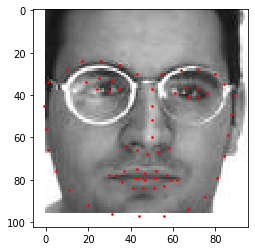

In [65]:
%matplotlib inline
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

landmarks_frame = pd.read_csv('dataset/train/face_landmarks.csv')

n = 500
img_name = landmarks_frame.ix[n, 0]
landmarks = landmarks_frame.ix[n, 1:].as_matrix().astype('float')
landmarks = landmarks.reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))

def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image, cmap='gray')
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)  

plt.figure()
show_landmarks(io.imread(os.path.join('dataset/train/', img_name)),
               landmarks)
plt.show()

Dataset class
-------------

``torch.utils.data.Dataset`` -- абстрактный класс представляющий датасет. 


Для нового класса датасета нужно отнаследоваться от класса Dataset и реализовать следующие функции:


- ``__len__``  так что len(dataset) возвратит длину датасета.


- ``__getitem__``  - индексация, такая что dataset[i] возвратит i-й элемент




In [58]:
class FaceLandmarksDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.landmarks_frame.ix[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.ix[idx, 1:].as_matrix().astype('float')
        landmarks = landmarks.reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample

0 (96, 96) (68, 2)


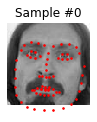

1 (96, 96) (68, 2)


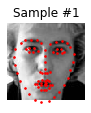

2 (96, 96) (68, 2)


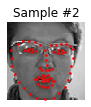

3 (96, 96) (68, 2)


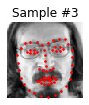

In [59]:
face_dataset = FaceLandmarksDataset(csv_file='dataset/train/face_landmarks.csv',
                                    root_dir='dataset/train')

fig = plt.figure()

for i in range(len(face_dataset)):
    sample = face_dataset[i]

    print(i, sample['image'].shape, sample['landmarks'].shape)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(**sample)

    if i == 3:
        plt.show()
        break

Преобразования (transformations)
----------

Так как часто не все изображения одинакового размера, нужно уметь автоматически приводить их к таковому. Также полезно уметь увеличивать размер датасета (аугментация).

-  ``Rescale``: приведение к определенному размеру
-  ``RandomCrop``: случайный кроп изображения. (вариант аугментации)
-  ``ToTensor``: приведение к тензору




In [60]:
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or tuple): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        # h and w are swapped for landmarks because for images,
        # x and y axes are axis 1 and 0 respectively
        landmarks = landmarks * [new_w / w, new_h / h]

        return {'image': img, 'landmarks': landmarks}


class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        image = image[top: top + new_h,
                      left: left + new_w]

        landmarks = landmarks - [left, top]

        return {'image': image, 'landmarks': landmarks}


class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']
 
        return {'image': torch.from_numpy(image),
                'landmarks': torch.from_numpy(landmarks)}

Приведем изображение к 68x68 и вырежем случайную область 60x60

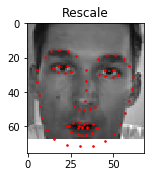

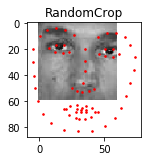

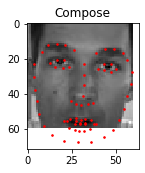

In [87]:
scale = Rescale(68)
crop = RandomCrop(60)
composed = transforms.Compose([Rescale(68),
                               RandomCrop(60)])

# Apply each of the above transforms on sample.
fig = plt.figure()
sample = face_dataset[65]
for i, tsfrm in enumerate([scale, crop, composed]):
    transformed_sample = tsfrm(sample)

    ax = plt.subplot(1, 3, i + 1)
    plt.tight_layout()
    ax.set_title(type(tsfrm).__name__)
    show_landmarks(**transformed_sample)

plt.show()

## Итерирование по датасету

In [88]:
transformed_dataset = FaceLandmarksDataset(csv_file='dataset/train/face_landmarks.csv',
                                           root_dir='dataset/train/',
                                           transform=transforms.Compose([
                                               Rescale(68),
                                               RandomCrop(60),
                                               ToTensor()
                                           ]))

for i in range(len(transformed_dataset)):
    sample = transformed_dataset[i]

    print(i, sample['image'].size(), sample['landmarks'].size())

    if i == 3:
        break

0 torch.Size([60, 60]) torch.Size([68, 2])
1 torch.Size([60, 60]) torch.Size([68, 2])
2 torch.Size([60, 60]) torch.Size([68, 2])
3 torch.Size([60, 60]) torch.Size([68, 2])


Для эффективного обучения хотим иметь еще следующие возможности:

-  Батчи
-  Шаффлы
-  Параллельная загрузка

``torch.utils.data.DataLoader`` итератор, который делает все что нам нужно. 

0
1
2
3


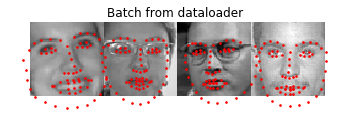

In [100]:
dataloader = DataLoader(transformed_dataset, batch_size=4,
                        shuffle=True, num_workers=4)


# Helper function to show a batch
def show_landmarks_batch(sample_batched):
    """Show image with landmarks for a batch of samples."""
    images_batch, landmarks_batch = \
            sample_batched['image'], sample_batched['landmarks']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)

    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose(1,0,2).reshape(im_size, -1), cmap="gray")

    for i in range(batch_size):
        plt.scatter(landmarks_batch[i, :, 0].numpy() + i * im_size,
                    landmarks_batch[i, :, 1].numpy(),
                    s=10, marker='.', c='r')

        plt.title('Batch from dataloader')

for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch)

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure()
        show_landmarks_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break

In [101]:
import pandas as pd

In [102]:
pd.read_csv("dataset/train/face_landmarks.csv")

,image_name,part_0_x,part_0_y,part_1_x,part_1_y,part_2_x,part_2_y,part_3_x,part_3_y,part_4_x,...,part_63_x,part_63_y,part_64_x,part_64_y,part_65_x,part_65_y,part_66_x,part_66_y,part_67_x,part_67_y
0,0.jpeg,10,43,9,53,8,64,8,74,10,...,47,78,56,80,47,77,43,77,39,77
1,1.jpeg,9,32,8,42,9,52,12,62,15,...,48,74,53,76,48,77,46,77,42,77
2,10.jpeg,4,34,5,44,6,54,9,64,14,...,50,70,56,72,50,72,47,72,43,72
3,100.jpeg,12,41,13,51,15,60,17,70,21,...,54,72,61,71,54,73,51,73,47,73
4,1000.jpeg,8,46,9,55,10,64,12,73,16,...,54,65,62,70,54,72,50,72,46,71
5,1001.jpeg,10,38,12,48,14,58,16,66,19,...,51,68,60,71,52,76,48,76,44,76
6,1002.jpeg,5,30,5,42,6,53,7,63,9,...,49,79,57,81,49,81,44,81,39,80
7,1003.jpeg,11,36,13,46,15,56,18,66,21,...,54,73,62,73,54,77,50,77,45,77
8,1004.jpeg,8,31,8,41,9,51,10,61,14,...,48,76,55,77,48,75,44,75,41,73
9,1005.jpeg,15,36,16,45,17,53,19,61,22,...,48,66,54,69,48,70,45,70,42,69


# Profiling

### В модуле ``torch.autograd.profiler`` реализованы методы для замера времени исполнения различных операций в PyTorch

In [103]:
x = torch.randn((2, 3), requires_grad=True)
a = torch.randn((3, 3), requires_grad=False)
with torch.autograd.profiler.profile() as prof:
    for _ in range(1000):
        y = (x @ a).norm()
        y.backward()

### Так же могут быть полезны утилиты ``cProfile``, ``torch.utils.bottleneck``,  ``snakeviz``